In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

39


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47921 stdev: 0.09246
Best fitness: 0.69388 - size: (2, 13) - species 1 - id 61
Average adjusted fitness: 0.157
Mean genetic distance 2.874, standard deviation 0.503
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 19.205 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52740 stdev: 0.09480
Best fitness: 0.71552 - size: (3, 14) - species 16 - id 338
Average adjusted fitness: 0.174
Mean genetic distance 2.957, standard deviation 0.477
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 20.220 sec (19.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55884 stdev: 0.09337
Best fitness: 0.73222 - size: (3, 17) - species 1 - id 487
Average adjusted fitness: 0.252
Mean genetic distance 3.021, standard deviation 0.478
Population of 204 members in 28 species
Total extinc

Population's average fitness: 0.65005 stdev: 0.11454
Best fitness: 0.77242 - size: (5, 21) - species 22 - id 1507
Average adjusted fitness: 0.344
Mean genetic distance 3.119, standard deviation 0.454
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 28.603 sec (25.066 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65384 stdev: 0.11515
Best fitness: 0.77737 - size: (5, 20) - species 22 - id 1637
Average adjusted fitness: 0.359
Mean genetic distance 3.143, standard deviation 0.465
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 29.401 sec (25.919 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64134 stdev: 0.11689
Best fitness: 0.77737 - size: (5, 20) - species 22 - id 1637
Average adjusted fitness: 0.355
Mean genetic distance 3.097, standard deviation 0.470
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 29.750 sec (26.774 average)

 

Population's average fitness: 0.54656 stdev: 0.06070
Best fitness: 0.70192 - size: (4, 16) - species 4 - id 680
Average adjusted fitness: 0.151
Mean genetic distance 2.983, standard deviation 0.471
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 22.998 sec (23.044 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55710 stdev: 0.06083
Best fitness: 0.70192 - size: (4, 16) - species 4 - id 680
Average adjusted fitness: 0.174
Mean genetic distance 3.094, standard deviation 0.478
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 22.956 sec (23.026 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56728 stdev: 0.06458
Best fitness: 0.70934 - size: (2, 13) - species 26 - id 892
Average adjusted fitness: 0.172
Mean genetic distance 3.128, standard deviation 0.485
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 34.766 sec (24.983 average)

 ****** 

Population's average fitness: 0.62248 stdev: 0.09130
Best fitness: 0.76747 - size: (5, 18) - species 5 - id 1743
Average adjusted fitness: 0.352
Mean genetic distance 3.114, standard deviation 0.479
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 22.148 sec (20.980 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63085 stdev: 0.07794
Best fitness: 0.78788 - size: (4, 17) - species 3 - id 2003
Average adjusted fitness: 0.237
Mean genetic distance 3.108, standard deviation 0.486
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 22.360 sec (21.261 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63598 stdev: 0.08451
Best fitness: 0.78788 - size: (4, 17) - species 3 - id 2003
Average adjusted fitness: 0.264
Mean genetic distance 3.140, standard deviation 0.480
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 23.015 sec (21.620 average)
numbe

Population's average fitness: 0.57196 stdev: 0.07843
Best fitness: 0.68646 - size: (3, 14) - species 9 - id 981
Average adjusted fitness: 0.189
Mean genetic distance 3.145, standard deviation 0.478
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 20.441 sec (19.413 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56160 stdev: 0.08559
Best fitness: 0.68646 - size: (3, 14) - species 9 - id 981
Average adjusted fitness: 0.187
Mean genetic distance 3.170, standard deviation 0.481
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 21.379 sec (19.659 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58077 stdev: 0.07927
Best fitness: 0.68646 - size: (3, 14) - species 9 - id 981
Average adjusted fitness: 0.181
Mean genetic distance 3.175, standard deviation 0.486
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 21.534 sec (19.867 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.50266 stdev: 0.05824
Best fitness: 0.72727 - size: (2, 13) - species 2 - id 133
Average adjusted fitness: 0.151
Mean genetic distance 2.870, standard deviation 0.461
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54263 stdev: 0.07179
Best fitness: 0.76005 - size: (3, 14) - species 2 - id 384
Average adjusted fitness: 0.205
Mean genetic distance 2.896, standard deviation 0.476
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 17.962 sec (17.565 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56013 stdev: 0.07944
Best fitness: 0.76005 - size: (3, 14) - species 9 - id 384
Average adjusted fitness: 0.177
Mean genetic distance 2.934, standard deviation 0.473
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 19.486 sec (18.2

Population's average fitness: 0.66051 stdev: 0.14246
Best fitness: 0.85900 - size: (7, 22) - species 1 - id 1216
Average adjusted fitness: 0.363
Mean genetic distance 3.100, standard deviation 0.496
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 21.591 sec (19.928 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68189 stdev: 0.12813
Best fitness: 0.85900 - size: (7, 22) - species 1 - id 1216
Average adjusted fitness: 0.471
Mean genetic distance 3.118, standard deviation 0.499
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 22.839 sec (20.526 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67286 stdev: 0.14452
Best fitness: 0.87322 - size: (7, 23) - species 1 - id 1819
Average adjusted fitness: 0.439
Mean genetic distance 3.141, standard deviation 0.474
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 21.819 sec (20.897 average)

 ***

Population's average fitness: 0.56018 stdev: 0.07126
Best fitness: 0.69511 - size: (3, 16) - species 4 - id 670
Average adjusted fitness: 0.262
Mean genetic distance 3.004, standard deviation 0.481
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 19.405 sec (18.846 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56397 stdev: 0.07124
Best fitness: 0.70006 - size: (4, 18) - species 4 - id 867
Average adjusted fitness: 0.205
Mean genetic distance 3.000, standard deviation 0.484
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.073 sec (18.891 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58356 stdev: 0.07150
Best fitness: 0.76190 - size: (3, 15) - species 21 - id 973
Average adjusted fitness: 0.223
Mean genetic distance 3.053, standard deviation 0.490
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 19.965 sec (19.070 average)

 ****** 

Population's average fitness: 0.61657 stdev: 0.07691
Best fitness: 0.76871 - size: (7, 23) - species 15 - id 1705
Average adjusted fitness: 0.236
Mean genetic distance 3.169, standard deviation 0.471
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 21.007 sec (20.497 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61400 stdev: 0.07465
Best fitness: 0.76871 - size: (7, 23) - species 15 - id 1705
Average adjusted fitness: 0.201
Mean genetic distance 3.159, standard deviation 0.468
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 22.394 sec (20.798 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61590 stdev: 0.07462
Best fitness: 0.78231 - size: (9, 27) - species 15 - id 1933
Average adjusted fitness: 0.212
Mean genetic distance 3.157, standard deviation 0.467
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 22.502 sec (21.094 average)
nu

Population's average fitness: 0.60410 stdev: 0.09815
Best fitness: 0.78479 - size: (4, 15) - species 15 - id 827
Average adjusted fitness: 0.243
Mean genetic distance 3.132, standard deviation 0.512
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 21.677 sec (19.446 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61665 stdev: 0.09312
Best fitness: 0.78479 - size: (4, 15) - species 15 - id 827
Average adjusted fitness: 0.298
Mean genetic distance 3.136, standard deviation 0.500
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 20.918 sec (19.630 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61750 stdev: 0.10385
Best fitness: 0.79097 - size: (6, 21) - species 21 - id 1335
Average adjusted fitness: 0.306
Mean genetic distance 3.158, standard deviation 0.511
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 21.714 sec (19.861 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.48951 stdev: 0.08342
Best fitness: 0.67285 - size: (2, 13) - species 5 - id 53
Average adjusted fitness: 0.181
Mean genetic distance 2.921, standard deviation 0.469
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 16.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53757 stdev: 0.07989
Best fitness: 0.70996 - size: (2, 13) - species 19 - id 365
Average adjusted fitness: 0.207
Mean genetic distance 3.095, standard deviation 0.490
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 18.194 sec (17.541 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54960 stdev: 0.08044
Best fitness: 0.76190 - size: (3, 13) - species 18 - id 544
Average adjusted fitness: 0.197
Mean genetic distance 3.087, standard deviation 0.498
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 19.145 sec (18.

Population's average fitness: 0.67506 stdev: 0.11523
Best fitness: 0.80025 - size: (5, 18) - species 35 - id 582
Average adjusted fitness: 0.381
Mean genetic distance 3.108, standard deviation 0.460
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 21.878 sec (19.836 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67649 stdev: 0.11610
Best fitness: 0.80025 - size: (5, 18) - species 35 - id 582
Average adjusted fitness: 0.377
Mean genetic distance 3.108, standard deviation 0.448
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 22.127 sec (20.365 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66541 stdev: 0.12417
Best fitness: 0.80025 - size: (5, 18) - species 35 - id 582
Average adjusted fitness: 0.391
Mean genetic distance 3.098, standard deviation 0.451
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 22.395 sec (20.806 average)

 ***

Population's average fitness: 0.68185 stdev: 0.16915
Best fitness: 0.85467 - size: (3, 16) - species 5 - id 519
Average adjusted fitness: 0.466
Mean genetic distance 3.093, standard deviation 0.498
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 19.760 sec (18.474 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67868 stdev: 0.17467
Best fitness: 0.85467 - size: (3, 16) - species 5 - id 519
Average adjusted fitness: 0.462
Mean genetic distance 3.074, standard deviation 0.488
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 19.743 sec (18.728 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72131 stdev: 0.14857
Best fitness: 0.85591 - size: (4, 18) - species 5 - id 971
Average adjusted fitness: 0.510
Mean genetic distance 3.136, standard deviation 0.490
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 20.225 sec (18.977 average)

 ****** R

Population's average fitness: 0.70656 stdev: 0.20445
Best fitness: 0.90538 - size: (3, 13) - species 7 - id 462
Average adjusted fitness: 0.526
Mean genetic distance 3.145, standard deviation 0.477
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 22.638 sec (21.479 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70890 stdev: 0.19934
Best fitness: 0.90538 - size: (3, 13) - species 7 - id 462
Average adjusted fitness: 0.518
Mean genetic distance 3.139, standard deviation 0.480
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 21.839 sec (21.657 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72728 stdev: 0.19473
Best fitness: 0.90538 - size: (3, 13) - species 7 - id 462
Average adjusted fitness: 0.536
Mean genetic distance 3.122, standard deviation 0.477
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 22.370 sec (21.822 average)
number o

Population's average fitness: 0.59142 stdev: 0.09169
Best fitness: 0.75572 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.237
Mean genetic distance 3.056, standard deviation 0.496
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 21.415 sec (19.328 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59388 stdev: 0.09407
Best fitness: 0.75572 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.322
Mean genetic distance 3.059, standard deviation 0.496
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.001 sec (19.537 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58761 stdev: 0.10205
Best fitness: 0.75572 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.299
Mean genetic distance 3.070, standard deviation 0.484
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 20.767 sec (19.673 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.51652 stdev: 0.09061
Best fitness: 0.71861 - size: (2, 13) - species 2 - id 42
Average adjusted fitness: 0.200
Mean genetic distance 2.891, standard deviation 0.469
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.157 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55024 stdev: 0.09176
Best fitness: 0.77180 - size: (3, 15) - species 16 - id 306
Average adjusted fitness: 0.241
Mean genetic distance 2.934, standard deviation 0.454
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.922 sec (17.540 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57403 stdev: 0.08697
Best fitness: 0.77180 - size: (3, 15) - species 16 - id 306
Average adjusted fitness: 0.250
Mean genetic distance 2.945, standard deviation 0.465
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 18.894 sec (17.

Population's average fitness: 0.60706 stdev: 0.10300
Best fitness: 0.77860 - size: (3, 15) - species 41 - id 637
Average adjusted fitness: 0.272
Mean genetic distance 3.123, standard deviation 0.472
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 22.327 sec (20.524 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60877 stdev: 0.10637
Best fitness: 0.78479 - size: (6, 20) - species 25 - id 1557
Average adjusted fitness: 0.272
Mean genetic distance 3.120, standard deviation 0.468
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 21.948 sec (21.024 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61602 stdev: 0.10075
Best fitness: 0.78479 - size: (6, 20) - species 25 - id 1557
Average adjusted fitness: 0.282
Mean genetic distance 3.145, standard deviation 0.469
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 23.076 sec (21.499 average)

 *

Population's average fitness: 0.67216 stdev: 0.19099
Best fitness: 0.83735 - size: (4, 18) - species 3 - id 661
Average adjusted fitness: 0.458
Mean genetic distance 2.995, standard deviation 0.498
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 19.605 sec (18.300 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69095 stdev: 0.16873
Best fitness: 0.84106 - size: (4, 19) - species 28 - id 864
Average adjusted fitness: 0.459
Mean genetic distance 3.044, standard deviation 0.494
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.910 sec (18.822 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68622 stdev: 0.18295
Best fitness: 0.87137 - size: (3, 16) - species 26 - id 975
Average adjusted fitness: 0.461
Mean genetic distance 3.043, standard deviation 0.488
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 20.505 sec (19.102 average)

 ******

Population's average fitness: 0.63309 stdev: 0.09912
Best fitness: 0.80829 - size: (5, 20) - species 1 - id 1268
Average adjusted fitness: 0.241
Mean genetic distance 3.218, standard deviation 0.499
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 23.607 sec (21.891 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63412 stdev: 0.10286
Best fitness: 0.80829 - size: (5, 20) - species 1 - id 1268
Average adjusted fitness: 0.366
Mean genetic distance 3.239, standard deviation 0.492
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 23.984 sec (22.332 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63864 stdev: 0.09408
Best fitness: 0.80829 - size: (5, 20) - species 1 - id 1268
Average adjusted fitness: 0.243
Mean genetic distance 3.250, standard deviation 0.497
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 24.239 sec (22.769 average)
numbe

Population's average fitness: 0.66286 stdev: 0.12197
Best fitness: 0.80643 - size: (3, 16) - species 10 - id 646
Average adjusted fitness: 0.421
Mean genetic distance 3.123, standard deviation 0.519
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 19.798 sec (19.008 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64774 stdev: 0.13369
Best fitness: 0.80643 - size: (3, 16) - species 10 - id 646
Average adjusted fitness: 0.376
Mean genetic distance 3.131, standard deviation 0.517
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 20.223 sec (19.160 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64077 stdev: 0.14439
Best fitness: 0.80643 - size: (3, 16) - species 10 - id 646
Average adjusted fitness: 0.357
Mean genetic distance 3.099, standard deviation 0.525
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 21.169 sec (19.383 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49964 stdev: 0.05533
Best fitness: 0.69079 - size: (2, 13) - species 5 - id 58
Average adjusted fitness: 0.156
Mean genetic distance 2.902, standard deviation 0.498
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.056 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52391 stdev: 0.06090
Best fitness: 0.69079 - size: (2, 13) - species 5 - id 58
Average adjusted fitness: 0.190
Mean genetic distance 2.973, standard deviation 0.501
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.457 sec (17.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53827 stdev: 0.06032
Best fitness: 0.70625 - size: (4, 18) - species 3 - id 503
Average adjusted fitness: 0.129
Mean genetic distance 3.040, standard deviation 0.505
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 19.031 sec (18.181

Population's average fitness: 0.69538 stdev: 0.09946
Best fitness: 0.80891 - size: (4, 17) - species 32 - id 1174
Average adjusted fitness: 0.389
Mean genetic distance 3.161, standard deviation 0.501
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 21.591 sec (20.245 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69825 stdev: 0.10361
Best fitness: 0.80891 - size: (4, 17) - species 32 - id 1174
Average adjusted fitness: 0.392
Mean genetic distance 3.169, standard deviation 0.495
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 21.755 sec (20.688 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68905 stdev: 0.10836
Best fitness: 0.81262 - size: (8, 27) - species 15 - id 1729
Average adjusted fitness: 0.375
Mean genetic distance 3.191, standard deviation 0.482
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 22.247 sec (21.081 average)

 

Population's average fitness: 0.58473 stdev: 0.07695
Best fitness: 0.72913 - size: (4, 18) - species 1 - id 689
Average adjusted fitness: 0.215
Mean genetic distance 3.058, standard deviation 0.498
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 19.901 sec (18.624 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59406 stdev: 0.07270
Best fitness: 0.72913 - size: (4, 18) - species 1 - id 689
Average adjusted fitness: 0.191
Mean genetic distance 3.130, standard deviation 0.516
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 20.529 sec (19.005 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60076 stdev: 0.07371
Best fitness: 0.72913 - size: (4, 18) - species 1 - id 689
Average adjusted fitness: 0.213
Mean genetic distance 3.151, standard deviation 0.522
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 21.277 sec (19.384 average)

 ****** R

Population's average fitness: 0.58957 stdev: 0.08121
Best fitness: 0.77613 - size: (4, 18) - species 30 - id 1665
Average adjusted fitness: 0.205
Mean genetic distance 3.180, standard deviation 0.482
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 20.541 sec (20.458 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59312 stdev: 0.07583
Best fitness: 0.77613 - size: (4, 18) - species 30 - id 1665
Average adjusted fitness: 0.152
Mean genetic distance 3.202, standard deviation 0.490
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 21.385 sec (20.656 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59220 stdev: 0.07948
Best fitness: 0.77613 - size: (4, 18) - species 30 - id 1665
Average adjusted fitness: 0.181
Mean genetic distance 3.197, standard deviation 0.482
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 21.313 sec (20.783 average)
nu

Population's average fitness: 0.63879 stdev: 0.13306
Best fitness: 0.80334 - size: (3, 15) - species 2 - id 301
Average adjusted fitness: 0.353
Mean genetic distance 3.100, standard deviation 0.463
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 21.975 sec (19.877 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65212 stdev: 0.12483
Best fitness: 0.80334 - size: (3, 15) - species 2 - id 301
Average adjusted fitness: 0.394
Mean genetic distance 3.118, standard deviation 0.457
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 21.564 sec (20.088 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65659 stdev: 0.12095
Best fitness: 0.80334 - size: (3, 15) - species 2 - id 301
Average adjusted fitness: 0.385
Mean genetic distance 3.125, standard deviation 0.468
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 22.012 sec (20.302 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.51323 stdev: 0.08411
Best fitness: 0.69140 - size: (2, 13) - species 1 - id 124
Average adjusted fitness: 0.227
Mean genetic distance 2.930, standard deviation 0.485
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.672 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55164 stdev: 0.08657
Best fitness: 0.69388 - size: (3, 15) - species 5 - id 306
Average adjusted fitness: 0.255
Mean genetic distance 3.055, standard deviation 0.499
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 17.951 sec (17.812 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56481 stdev: 0.08650
Best fitness: 0.74768 - size: (4, 17) - species 9 - id 469
Average adjusted fitness: 0.283
Mean genetic distance 3.084, standard deviation 0.494
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 19.178 sec (18.2

Population's average fitness: 0.64398 stdev: 0.12864
Best fitness: 0.81571 - size: (6, 20) - species 27 - id 1523
Average adjusted fitness: 0.341
Mean genetic distance 3.191, standard deviation 0.507
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 21.505 sec (20.220 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65507 stdev: 0.12466
Best fitness: 0.81571 - size: (6, 20) - species 27 - id 1523
Average adjusted fitness: 0.350
Mean genetic distance 3.207, standard deviation 0.506
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 22.694 sec (20.807 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65349 stdev: 0.12519
Best fitness: 0.81571 - size: (6, 20) - species 27 - id 1523
Average adjusted fitness: 0.351
Mean genetic distance 3.226, standard deviation 0.500
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 23.299 sec (21.298 average)

 

Population's average fitness: 0.57875 stdev: 0.10086
Best fitness: 0.77798 - size: (2, 14) - species 13 - id 543
Average adjusted fitness: 0.223
Mean genetic distance 3.091, standard deviation 0.507
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 19.994 sec (18.698 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57881 stdev: 0.09618
Best fitness: 0.77798 - size: (2, 14) - species 13 - id 543
Average adjusted fitness: 0.246
Mean genetic distance 3.062, standard deviation 0.505
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 20.513 sec (19.061 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59663 stdev: 0.09304
Best fitness: 0.77798 - size: (2, 14) - species 13 - id 543
Average adjusted fitness: 0.303
Mean genetic distance 3.082, standard deviation 0.500
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 21.687 sec (19.499 average)

 *****

Population's average fitness: 0.58036 stdev: 0.06759
Best fitness: 0.73346 - size: (5, 16) - species 12 - id 1592
Average adjusted fitness: 0.170
Mean genetic distance 3.151, standard deviation 0.482
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 21.838 sec (20.951 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58124 stdev: 0.06868
Best fitness: 0.73346 - size: (5, 16) - species 12 - id 1592
Average adjusted fitness: 0.175
Mean genetic distance 3.167, standard deviation 0.489
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 21.555 sec (21.133 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58561 stdev: 0.06804
Best fitness: 0.73346 - size: (5, 16) - species 12 - id 1592
Average adjusted fitness: 0.193
Mean genetic distance 3.175, standard deviation 0.491
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 22.003 sec (21.292 average)
nu

Population's average fitness: 0.58916 stdev: 0.07609
Best fitness: 0.71243 - size: (5, 18) - species 27 - id 967
Average adjusted fitness: 0.185
Mean genetic distance 3.131, standard deviation 0.477
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 21.704 sec (19.728 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58574 stdev: 0.08730
Best fitness: 0.73284 - size: (4, 16) - species 24 - id 1192
Average adjusted fitness: 0.195
Mean genetic distance 3.149, standard deviation 0.469
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 21.999 sec (20.012 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59904 stdev: 0.08088
Best fitness: 0.73284 - size: (4, 16) - species 24 - id 1192
Average adjusted fitness: 0.256
Mean genetic distance 3.153, standard deviation 0.467
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 22.079 sec (20.241 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.54440 stdev: 0.15555
Best fitness: 0.80210 - size: (2, 13) - species 2 - id 192
Average adjusted fitness: 0.352
Mean genetic distance 2.930, standard deviation 0.474
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.220 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61790 stdev: 0.13896
Best fitness: 0.80210 - size: (2, 13) - species 7 - id 192
Average adjusted fitness: 0.402
Mean genetic distance 3.018, standard deviation 0.491
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 18.389 sec (17.804 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64627 stdev: 0.12530
Best fitness: 0.82127 - size: (4, 16) - species 22 - id 436
Average adjusted fitness: 0.336
Mean genetic distance 3.044, standard deviation 0.475
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 19.093 sec (18.

Population's average fitness: 0.70825 stdev: 0.18484
Best fitness: 0.91651 - size: (2, 13) - species 1 - id 1045
Average adjusted fitness: 0.547
Mean genetic distance 3.217, standard deviation 0.528
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 22.398 sec (20.558 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73088 stdev: 0.17281
Best fitness: 0.91651 - size: (2, 13) - species 1 - id 1045
Average adjusted fitness: 0.521
Mean genetic distance 3.188, standard deviation 0.530
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 21.975 sec (21.059 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71242 stdev: 0.18976
Best fitness: 0.91651 - size: (2, 13) - species 1 - id 1045
Average adjusted fitness: 0.508
Mean genetic distance 3.182, standard deviation 0.526
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 22.302 sec (21.413 average)

 ***

Population's average fitness: 0.57406 stdev: 0.08819
Best fitness: 0.72975 - size: (3, 14) - species 5 - id 647
Average adjusted fitness: 0.230
Mean genetic distance 3.028, standard deviation 0.463
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.448 sec (18.342 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57741 stdev: 0.09305
Best fitness: 0.74026 - size: (4, 17) - species 15 - id 823
Average adjusted fitness: 0.192
Mean genetic distance 3.062, standard deviation 0.475
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 20.458 sec (18.765 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58887 stdev: 0.09163
Best fitness: 0.74026 - size: (4, 17) - species 15 - id 823
Average adjusted fitness: 0.201
Mean genetic distance 3.059, standard deviation 0.480
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 21.326 sec (19.192 average)

 ******

Population's average fitness: 0.60208 stdev: 0.09222
Best fitness: 0.77984 - size: (4, 18) - species 30 - id 1630
Average adjusted fitness: 0.218
Mean genetic distance 3.220, standard deviation 0.494
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 20.937 sec (21.327 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60544 stdev: 0.09566
Best fitness: 0.77984 - size: (4, 18) - species 30 - id 1630
Average adjusted fitness: 0.252
Mean genetic distance 3.236, standard deviation 0.500
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 22.183 sec (21.567 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59582 stdev: 0.09700
Best fitness: 0.77984 - size: (4, 18) - species 30 - id 1630
Average adjusted fitness: 0.198
Mean genetic distance 3.240, standard deviation 0.499
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 22.789 sec (21.663 average)
nu

Population's average fitness: 0.56873 stdev: 0.08428
Best fitness: 0.70192 - size: (3, 16) - species 23 - id 539
Average adjusted fitness: 0.221
Mean genetic distance 3.023, standard deviation 0.493
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 20.855 sec (19.398 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58303 stdev: 0.07614
Best fitness: 0.70192 - size: (3, 16) - species 23 - id 539
Average adjusted fitness: 0.204
Mean genetic distance 3.015, standard deviation 0.496
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 21.718 sec (19.688 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57881 stdev: 0.08011
Best fitness: 0.70377 - size: (7, 21) - species 14 - id 1448
Average adjusted fitness: 0.238
Mean genetic distance 3.009, standard deviation 0.503
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 22.325 sec (19.981 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49781 stdev: 0.08207
Best fitness: 0.76438 - size: (2, 13) - species 1 - id 16
Average adjusted fitness: 0.260
Mean genetic distance 2.826, standard deviation 0.481
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.459 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54650 stdev: 0.09414
Best fitness: 0.77984 - size: (3, 15) - species 2 - id 296
Average adjusted fitness: 0.280
Mean genetic distance 2.975, standard deviation 0.499
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.036 sec (18.248 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57692 stdev: 0.09646
Best fitness: 0.79344 - size: (4, 15) - species 11 - id 486
Average adjusted fitness: 0.295
Mean genetic distance 3.097, standard deviation 0.504
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 19.411 sec (18.6

Population's average fitness: 0.62594 stdev: 0.09664
Best fitness: 0.76809 - size: (5, 21) - species 12 - id 1141
Average adjusted fitness: 0.255
Mean genetic distance 3.122, standard deviation 0.490
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 21.578 sec (20.337 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63241 stdev: 0.09499
Best fitness: 0.76809 - size: (5, 21) - species 12 - id 1141
Average adjusted fitness: 0.316
Mean genetic distance 3.118, standard deviation 0.492
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 21.815 sec (20.766 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63742 stdev: 0.09422
Best fitness: 0.78788 - size: (6, 23) - species 12 - id 1839
Average adjusted fitness: 0.241
Mean genetic distance 3.145, standard deviation 0.493
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 22.014 sec (21.100 average)

 

Population's average fitness: 0.56714 stdev: 0.09429
Best fitness: 0.75758 - size: (3, 15) - species 14 - id 541
Average adjusted fitness: 0.300
Mean genetic distance 3.092, standard deviation 0.513
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.155 sec (18.899 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57125 stdev: 0.09537
Best fitness: 0.75758 - size: (3, 15) - species 14 - id 541
Average adjusted fitness: 0.313
Mean genetic distance 3.066, standard deviation 0.488
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 20.369 sec (19.193 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58953 stdev: 0.09369
Best fitness: 0.75758 - size: (3, 15) - species 14 - id 541
Average adjusted fitness: 0.367
Mean genetic distance 3.073, standard deviation 0.482
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 21.873 sec (19.639 average)

 *****

Population's average fitness: 0.63303 stdev: 0.11289
Best fitness: 0.84848 - size: (5, 20) - species 10 - id 1571
Average adjusted fitness: 0.385
Mean genetic distance 3.166, standard deviation 0.520
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 21.995 sec (21.465 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63791 stdev: 0.11509
Best fitness: 0.84848 - size: (5, 20) - species 10 - id 1571
Average adjusted fitness: 0.446
Mean genetic distance 3.158, standard deviation 0.507
Population of 190 members in 38 species
Total extinctions: 0
Generation time: 22.450 sec (21.740 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64618 stdev: 0.10669
Best fitness: 0.85281 - size: (6, 22) - species 10 - id 2199
Average adjusted fitness: 0.246
Mean genetic distance 3.161, standard deviation 0.502
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 21.641 sec (21.838 average)
nu

Population's average fitness: 0.59334 stdev: 0.11164
Best fitness: 0.81818 - size: (4, 16) - species 31 - id 797
Average adjusted fitness: 0.283
Mean genetic distance 3.177, standard deviation 0.482
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 21.187 sec (19.719 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60748 stdev: 0.10630
Best fitness: 0.81818 - size: (4, 16) - species 31 - id 797
Average adjusted fitness: 0.254
Mean genetic distance 3.176, standard deviation 0.490
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 21.388 sec (19.927 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61034 stdev: 0.11188
Best fitness: 0.81818 - size: (4, 16) - species 31 - id 797
Average adjusted fitness: 0.266
Mean genetic distance 3.160, standard deviation 0.483
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 22.245 sec (20.185 average)

 *****

Population's average fitness: 0.48233 stdev: 0.08174
Best fitness: 0.65863 - size: (2, 13) - species 1 - id 47
Average adjusted fitness: 0.155
Mean genetic distance 2.923, standard deviation 0.446
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.068 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53319 stdev: 0.07940
Best fitness: 0.71305 - size: (3, 15) - species 6 - id 342
Average adjusted fitness: 0.186
Mean genetic distance 2.929, standard deviation 0.478
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 18.663 sec (17.866 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55654 stdev: 0.07692
Best fitness: 0.71305 - size: (3, 15) - species 10 - id 342
Average adjusted fitness: 0.222
Mean genetic distance 2.910, standard deviation 0.494
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.230 sec (18.321 average)

 ****** Running generation

Population's average fitness: 0.64614 stdev: 0.11646
Best fitness: 0.81633 - size: (3, 16) - species 5 - id 1359
Average adjusted fitness: 0.307
Mean genetic distance 3.180, standard deviation 0.482
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 21.500 sec (20.002 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63981 stdev: 0.12064
Best fitness: 0.81633 - size: (3, 16) - species 32 - id 1359
Average adjusted fitness: 0.277
Mean genetic distance 3.166, standard deviation 0.500
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 20.963 sec (20.405 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66609 stdev: 0.10989
Best fitness: 0.81633 - size: (3, 16) - species 32 - id 1359
Average adjusted fitness: 0.306
Mean genetic distance 3.190, standard deviation 0.490
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 21.574 sec (20.729 average)

 *

Population's average fitness: 0.58537 stdev: 0.08135
Best fitness: 0.73346 - size: (2, 14) - species 29 - id 534
Average adjusted fitness: 0.209
Mean genetic distance 3.118, standard deviation 0.489
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 19.775 sec (18.448 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59754 stdev: 0.07819
Best fitness: 0.73346 - size: (2, 14) - species 19 - id 534
Average adjusted fitness: 0.232
Mean genetic distance 3.127, standard deviation 0.501
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 19.579 sec (18.674 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59455 stdev: 0.08490
Best fitness: 0.73346 - size: (2, 14) - species 19 - id 534
Average adjusted fitness: 0.210
Mean genetic distance 3.117, standard deviation 0.495
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 20.341 sec (18.952 average)

 *****

Population's average fitness: 0.66289 stdev: 0.10478
Best fitness: 0.84168 - size: (4, 19) - species 10 - id 690
Average adjusted fitness: 0.322
Mean genetic distance 3.183, standard deviation 0.459
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 21.678 sec (21.281 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65854 stdev: 0.11227
Best fitness: 0.84168 - size: (4, 19) - species 10 - id 690
Average adjusted fitness: 0.309
Mean genetic distance 3.187, standard deviation 0.470
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 21.912 sec (21.495 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66531 stdev: 0.10641
Best fitness: 0.84168 - size: (4, 19) - species 10 - id 690
Average adjusted fitness: 0.278
Mean genetic distance 3.189, standard deviation 0.469
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 22.121 sec (21.709 average)
numbe

Population's average fitness: 0.62924 stdev: 0.13285
Best fitness: 0.78417 - size: (3, 14) - species 31 - id 540
Average adjusted fitness: 0.335
Mean genetic distance 3.071, standard deviation 0.500
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.170 sec (19.059 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65720 stdev: 0.10536
Best fitness: 0.79530 - size: (4, 15) - species 31 - id 1240
Average adjusted fitness: 0.361
Mean genetic distance 3.086, standard deviation 0.502
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.142 sec (19.319 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65905 stdev: 0.10808
Best fitness: 0.79530 - size: (4, 15) - species 31 - id 1240
Average adjusted fitness: 0.377
Mean genetic distance 3.101, standard deviation 0.502
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 21.138 sec (19.521 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.47729 stdev: 0.09728
Best fitness: 0.73655 - size: (2, 13) - species 3 - id 199
Average adjusted fitness: 0.234
Mean genetic distance 2.930, standard deviation 0.483
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.051 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53090 stdev: 0.10225
Best fitness: 0.80210 - size: (2, 13) - species 24 - id 373
Average adjusted fitness: 0.286
Mean genetic distance 3.010, standard deviation 0.497
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 17.966 sec (17.509 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57046 stdev: 0.09901
Best fitness: 0.80210 - size: (2, 13) - species 24 - id 373
Average adjusted fitness: 0.233
Mean genetic distance 3.047, standard deviation 0.504
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.782 sec (17

Population's average fitness: 0.63982 stdev: 0.12778
Best fitness: 0.76067 - size: (5, 17) - species 3 - id 1388
Average adjusted fitness: 0.371
Mean genetic distance 3.138, standard deviation 0.502
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 22.401 sec (20.415 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65439 stdev: 0.10450
Best fitness: 0.76067 - size: (5, 17) - species 3 - id 1388
Average adjusted fitness: 0.346
Mean genetic distance 3.169, standard deviation 0.500
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 22.000 sec (20.876 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65287 stdev: 0.11387
Best fitness: 0.76067 - size: (5, 17) - species 3 - id 1388
Average adjusted fitness: 0.344
Mean genetic distance 3.144, standard deviation 0.496
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 22.251 sec (21.262 average)

 ***

Population's average fitness: 0.56425 stdev: 0.08283
Best fitness: 0.80891 - size: (5, 18) - species 7 - id 694
Average adjusted fitness: 0.210
Mean genetic distance 3.112, standard deviation 0.504
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 20.079 sec (18.860 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57426 stdev: 0.08639
Best fitness: 0.80891 - size: (5, 18) - species 7 - id 694
Average adjusted fitness: 0.231
Mean genetic distance 3.144, standard deviation 0.505
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.202 sec (19.128 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58037 stdev: 0.08143
Best fitness: 0.80891 - size: (5, 18) - species 7 - id 694
Average adjusted fitness: 0.166
Mean genetic distance 3.190, standard deviation 0.497
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 21.569 sec (19.535 average)

 ****** R

Population's average fitness: 0.62530 stdev: 0.09470
Best fitness: 0.76005 - size: (4, 17) - species 5 - id 1635
Average adjusted fitness: 0.335
Mean genetic distance 3.082, standard deviation 0.506
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 22.153 sec (22.001 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63065 stdev: 0.08855
Best fitness: 0.76005 - size: (4, 17) - species 5 - id 1635
Average adjusted fitness: 0.256
Mean genetic distance 3.092, standard deviation 0.508
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 22.674 sec (22.200 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62086 stdev: 0.10064
Best fitness: 0.76005 - size: (4, 17) - species 5 - id 1635
Average adjusted fitness: 0.232
Mean genetic distance 3.106, standard deviation 0.504
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 22.424 sec (22.318 average)
numbe

Population's average fitness: 0.69954 stdev: 0.17177
Best fitness: 0.87322 - size: (5, 18) - species 11 - id 732
Average adjusted fitness: 0.481
Mean genetic distance 3.066, standard deviation 0.496
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 19.604 sec (18.359 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70798 stdev: 0.17035
Best fitness: 0.87322 - size: (5, 18) - species 11 - id 732
Average adjusted fitness: 0.508
Mean genetic distance 3.083, standard deviation 0.481
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 19.327 sec (18.480 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69678 stdev: 0.17986
Best fitness: 0.87322 - size: (5, 18) - species 11 - id 732
Average adjusted fitness: 0.493
Mean genetic distance 3.083, standard deviation 0.480
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 19.759 sec (18.622 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51595 stdev: 0.08239
Best fitness: 0.69759 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.189
Mean genetic distance 2.919, standard deviation 0.479
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.903 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56682 stdev: 0.07511
Best fitness: 0.69759 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.197
Mean genetic distance 3.053, standard deviation 0.475
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 17.403 sec (16.653 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57168 stdev: 0.08437
Best fitness: 0.70254 - size: (4, 16) - species 8 - id 469
Average adjusted fitness: 0.231
Mean genetic distance 3.042, standard deviation 0.468
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 17.864 sec (17.057

Population's average fitness: 0.60768 stdev: 0.09566
Best fitness: 0.75448 - size: (4, 18) - species 24 - id 657
Average adjusted fitness: 0.287
Mean genetic distance 3.192, standard deviation 0.502
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 19.901 sec (18.736 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60750 stdev: 0.09473
Best fitness: 0.75448 - size: (4, 18) - species 24 - id 657
Average adjusted fitness: 0.282
Mean genetic distance 3.169, standard deviation 0.511
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 20.209 sec (19.186 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60727 stdev: 0.09496
Best fitness: 0.75634 - size: (4, 15) - species 10 - id 1815
Average adjusted fitness: 0.238
Mean genetic distance 3.170, standard deviation 0.495
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 20.003 sec (19.486 average)

 **

Population's average fitness: 0.58536 stdev: 0.10942
Best fitness: 0.79592 - size: (3, 14) - species 2 - id 352
Average adjusted fitness: 0.358
Mean genetic distance 3.135, standard deviation 0.483
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 18.472 sec (17.294 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61037 stdev: 0.10425
Best fitness: 0.83426 - size: (4, 17) - species 25 - id 764
Average adjusted fitness: 0.311
Mean genetic distance 3.192, standard deviation 0.477
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 18.651 sec (17.566 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61917 stdev: 0.11007
Best fitness: 0.83426 - size: (4, 17) - species 26 - id 764
Average adjusted fitness: 0.373
Mean genetic distance 3.220, standard deviation 0.461
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 19.102 sec (17.822 average)

 ******

Population's average fitness: 0.60588 stdev: 0.09307
Best fitness: 0.75634 - size: (5, 16) - species 32 - id 1511
Average adjusted fitness: 0.263
Mean genetic distance 3.199, standard deviation 0.470
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 20.470 sec (19.681 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60991 stdev: 0.09588
Best fitness: 0.75634 - size: (5, 16) - species 32 - id 1511
Average adjusted fitness: 0.256
Mean genetic distance 3.210, standard deviation 0.470
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 20.676 sec (19.917 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61563 stdev: 0.08555
Best fitness: 0.75634 - size: (5, 16) - species 32 - id 1511
Average adjusted fitness: 0.240
Mean genetic distance 3.197, standard deviation 0.468
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 21.479 sec (20.202 average)
nu

Population's average fitness: 0.58339 stdev: 0.08358
Best fitness: 0.80210 - size: (5, 18) - species 21 - id 1089
Average adjusted fitness: 0.196
Mean genetic distance 3.085, standard deviation 0.476
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 20.141 sec (18.218 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58476 stdev: 0.08680
Best fitness: 0.80210 - size: (5, 18) - species 21 - id 1089
Average adjusted fitness: 0.190
Mean genetic distance 3.121, standard deviation 0.475
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 20.355 sec (18.485 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58886 stdev: 0.09151
Best fitness: 0.80210 - size: (5, 18) - species 21 - id 1089
Average adjusted fitness: 0.290
Mean genetic distance 3.168, standard deviation 0.460
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 20.852 sec (18.748 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.53221 stdev: 0.08054
Best fitness: 0.70686 - size: (2, 13) - species 3 - id 11
Average adjusted fitness: 0.191
Mean genetic distance 2.835, standard deviation 0.439
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 15.893 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55793 stdev: 0.07460
Best fitness: 0.70686 - size: (2, 13) - species 3 - id 11
Average adjusted fitness: 0.228
Mean genetic distance 2.972, standard deviation 0.472
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 16.633 sec (16.263 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57573 stdev: 0.07293
Best fitness: 0.70686 - size: (2, 13) - species 6 - id 11
Average adjusted fitness: 0.247
Mean genetic distance 3.044, standard deviation 0.472
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 17.776 sec (16.767 

Population's average fitness: 0.60142 stdev: 0.07677
Best fitness: 0.71429 - size: (4, 19) - species 7 - id 1295
Average adjusted fitness: 0.247
Mean genetic distance 3.080, standard deviation 0.494
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 19.420 sec (18.690 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60890 stdev: 0.07378
Best fitness: 0.73779 - size: (5, 17) - species 21 - id 1582
Average adjusted fitness: 0.212
Mean genetic distance 3.092, standard deviation 0.477
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 20.663 sec (19.180 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60156 stdev: 0.07936
Best fitness: 0.73779 - size: (5, 17) - species 21 - id 1582
Average adjusted fitness: 0.228
Mean genetic distance 3.121, standard deviation 0.469
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 20.777 sec (19.561 average)

 *

Population's average fitness: 0.57119 stdev: 0.09556
Best fitness: 0.77922 - size: (3, 15) - species 7 - id 457
Average adjusted fitness: 0.229
Mean genetic distance 3.094, standard deviation 0.470
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 18.729 sec (17.328 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58077 stdev: 0.09081
Best fitness: 0.77922 - size: (3, 15) - species 7 - id 457
Average adjusted fitness: 0.242
Mean genetic distance 3.086, standard deviation 0.478
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 20.290 sec (17.920 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58354 stdev: 0.09799
Best fitness: 0.79406 - size: (5, 20) - species 4 - id 932
Average adjusted fitness: 0.302
Mean genetic distance 3.097, standard deviation 0.487
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 19.888 sec (18.248 average)

 ****** R

Population's average fitness: 0.62310 stdev: 0.10727
Best fitness: 0.80025 - size: (4, 17) - species 2 - id 1406
Average adjusted fitness: 0.252
Mean genetic distance 3.136, standard deviation 0.467
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 17.622 sec (19.202 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62877 stdev: 0.10256
Best fitness: 0.80025 - size: (4, 17) - species 2 - id 1406
Average adjusted fitness: 0.258
Mean genetic distance 3.123, standard deviation 0.473
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 18.205 sec (19.193 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62288 stdev: 0.10976
Best fitness: 0.80025 - size: (4, 17) - species 2 - id 1406
Average adjusted fitness: 0.256
Mean genetic distance 3.099, standard deviation 0.472
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 17.944 sec (19.076 average)
numbe

Population's average fitness: 0.61498 stdev: 0.13316
Best fitness: 0.77365 - size: (3, 14) - species 23 - id 961
Average adjusted fitness: 0.332
Mean genetic distance 3.164, standard deviation 0.505
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 17.665 sec (15.942 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62423 stdev: 0.12861
Best fitness: 0.77365 - size: (3, 14) - species 23 - id 961
Average adjusted fitness: 0.323
Mean genetic distance 3.176, standard deviation 0.508
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 17.052 sec (16.080 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62350 stdev: 0.12581
Best fitness: 0.77365 - size: (3, 14) - species 23 - id 961
Average adjusted fitness: 0.367
Mean genetic distance 3.148, standard deviation 0.501
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 17.242 sec (16.210 average)

 *****

Population's average fitness: 0.51883 stdev: 0.08239
Best fitness: 0.68584 - size: (2, 13) - species 3 - id 102
Average adjusted fitness: 0.193
Mean genetic distance 2.892, standard deviation 0.446
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.938 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54284 stdev: 0.08393
Best fitness: 0.70810 - size: (2, 14) - species 18 - id 352
Average adjusted fitness: 0.242
Mean genetic distance 2.944, standard deviation 0.460
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.905 sec (14.422 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56407 stdev: 0.07918
Best fitness: 0.72047 - size: (4, 16) - species 18 - id 535
Average adjusted fitness: 0.174
Mean genetic distance 2.966, standard deviation 0.462
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 15.459 sec (14.767 average)

 ****** Running generati

Population's average fitness: 0.60556 stdev: 0.08705
Best fitness: 0.77489 - size: (6, 23) - species 29 - id 1556
Average adjusted fitness: 0.247
Mean genetic distance 3.111, standard deviation 0.499
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 17.240 sec (16.125 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59622 stdev: 0.09574
Best fitness: 0.77489 - size: (6, 23) - species 29 - id 1556
Average adjusted fitness: 0.239
Mean genetic distance 3.105, standard deviation 0.501
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 18.148 sec (16.540 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60222 stdev: 0.09739
Best fitness: 0.77489 - size: (6, 23) - species 29 - id 1556
Average adjusted fitness: 0.287
Mean genetic distance 3.110, standard deviation 0.506
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 17.527 sec (16.827 average)

 

Population's average fitness: 0.57015 stdev: 0.09709
Best fitness: 0.76809 - size: (2, 13) - species 14 - id 283
Average adjusted fitness: 0.245
Mean genetic distance 3.062, standard deviation 0.488
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 15.680 sec (14.729 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58474 stdev: 0.09793
Best fitness: 0.78169 - size: (5, 20) - species 24 - id 810
Average adjusted fitness: 0.231
Mean genetic distance 3.118, standard deviation 0.480
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 16.043 sec (14.991 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59111 stdev: 0.10633
Best fitness: 0.81818 - size: (4, 15) - species 23 - id 909
Average adjusted fitness: 0.298
Mean genetic distance 3.165, standard deviation 0.471
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 16.275 sec (15.205 average)

 *****

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8166666666666667

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  1  0]
 [ 0 11  0  1  0  0  0  0  0  2]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  1  0  0  3  0]
 [ 0  1  0  0 18  1  0  1  1  0]
 [ 0  0  0  2  1 15  0  0  1  2]
 [ 0  0  0  0  0  1 18  0  0  0]
 [ 0  0  0  2  1  0  0 18  1  0]
 [ 0  7  0  3  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


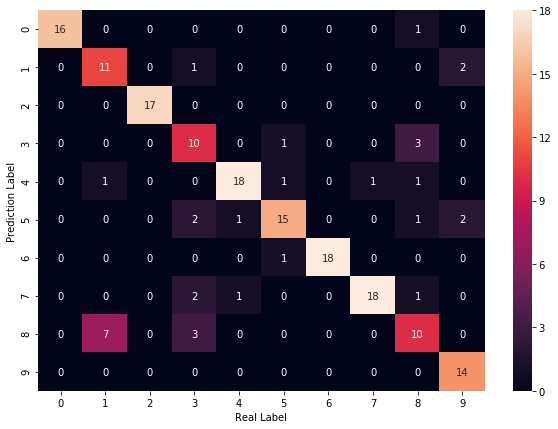

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:23 index:[5] real:5
#1 min_error:28 index:[2] real:2
#2 min_error:26 index:[8] real:8
#3 min_error:9 index:[0] real:0
#4 min_error:28 index:[1] real:1
#5 min_error:22 index:[7] real:7
#6 min_error:19 index:[6] real:6
#7 min_error:26 index:[3] real:3
#8 min_error:11 index:[2] real:2
#9 min_error:33 index:[1] real:1
#10 min_error:30 index:[7] real:7
#11 min_error:33 index:[7] real:4
#12 min_error:14 index:[6] real:6
#13 min_error:25 index:[3] real:3
#14 min_error:27 index:[1] real:1
#15 min_error:30 index:[1] real:3
#16 min_error:35 index:[1] real:9
#17 min_error:29 index:[1] real:1
#18 min_error:28 index:[7] real:7
#19 min_error:10 index:[6] real:6
#20 min_error:23 index:[8] real:8
#21 min_error:12 index:[4] real:4
#22 min_error:27 index:[3] real:3
#23 min_error:32 index:[1 4] real:1
#24 min_error:15 index:[4] real:4
#25 min_error:13 index:[0] real:0
#26 min_error:12 index:[5] real:5
#27 min_error:24 index:[3] real:3
#28 min_error:30 index:[6] real:6
#29 min_error:26 index:

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8948670377241806
Avg Base Learner:0.7978293135435993


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.06666666666666667
Accuracy on training set: 0.16111111111111112
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.24444444444444444
Accuracy on training set: 0.3388888888888889
Accuracy on training set: 0.3333333333333333
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.40555555555555556
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.55
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.6
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.68333

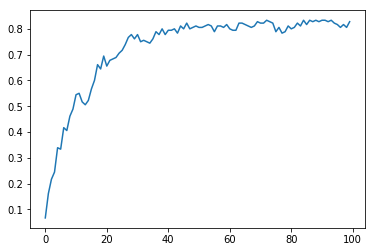

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.06666666666666667,
 0.16111111111111112,
 0.21666666666666667,
 0.24444444444444444,
 0.3388888888888889,
 0.3333333333333333,
 0.4166666666666667,
 0.40555555555555556,
 0.46111111111111114,
 0.4888888888888889,
 0.5444444444444444,
 0.55,
 0.5166666666666667,
 0.5055555555555555,
 0.5222222222222223,
 0.5666666666666667,
 0.6,
 0.6611111111111111,
 0.6444444444444445,
 0.6944444444444444,
 0.6555555555555556,
 0.6777777777777778,
 0.6833333333333333,
 0.6888888888888889,
 0.7055555555555556,
 0.7166666666666667,
 0.7388888888888889,
 0.7666666666666667,
 0.7777777777777778,
 0.7611111111111111,
 0.7777777777777778,
 0.75,
 0.7555555555555555,
 0.75,
 0.7444444444444445,
 0.7611111111111111,
 0.7888888888888889,
 0.7777777777777778,
 0.8,
 0.7777777777777778,
 0.7944444444444444,
 0.7944444444444444,
 0.8,
 0.7833333333333333,
 0.8111111111111111,
 0.8,
 0.8222222222222222,
 0.8,
 0.8055555555555556,
 0.8111111111111111,
 0.8055555555555556,
 0.8055555555555556,
 0.8111111111111111